# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

## <span style="color:darkred">Módulo I - Dados Estruturados e Não Estruturados</span>


### <span style="color:darkred">Problemas típicos em bases de dados:  Informações faltantes</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

__Conteúdo:__
1. Dados Não-estruturados
2. Dados Estruturados
3. *Problemas típicos em bases de dados*
    1. *Informações faltantes*
    2. Pontos "fora da curva" (*outliers*)
    3. Informações errôneas
    4. Dados redundantes
    5. Dados desbalanceados

__Referências:__
- Salvador García, Julián Luengo, Francisco Herrera. Data Processing in Data Mining, 2015.
- Hadley Wickham, Tidy Data. Journal of Statistical Software, v.59, n.10, 2014.
- Katti Faceli; Ana Carolina Lorena; João Gama; André C.P.L.F. Carvalho. Inteligência Artificial: uma abordagem de aprendizado de máquina, 2011.

__Referência complementar:__
- Karthika Mohan; Judea Pearl; Tian Jin. Missing data as a causal inference problem. In: Proceedings of the Neural Information Processing Systems Conference (NIPS). 2013.

***

## Problemas típicos em bases de dados

* bases de dados, ainda que estruturadas, possuem problemas
* a regra 80/20 diz que **80%** do tempo dos cientistas de dados é gasto **encontrando, limpando e organizando dados**

    https://www.ibm.com/cloud/blog/ibm-data-catalog-data-scientists-productivity
    
<img src="./imagens/ibm-8020rule.png" alt="drawing" width="700"/>

* *não reconhecer esses problemas e ignorá-los pode levar a conclusões erradas na fase de análise.*



## A. Informações faltantes (*missing data*)


#### Razões para dados faltantes

A maior causa da existência de dados faltantes está no projeto do protocolo de *coleta de dados* e na sua execução.

Podemos observar as seguintes fontes de dados faltantes:

* Omissão / não preenchimento de campo:
    * usuário esqueceu
    * usuário escolheu não preencher por não saber como preencher
    * usuário preferiu não preencher com receio da interpretação da resposta
    
    
* Dados perdidos: 
    * na digitação (quando em papel), 
    * na transferência de dados 
    * na migração de bases de dados 
    * na conversão entre formatos de arquivos    
    
    
* Erro de programação



#### Tipo do dado faltante

Seja $V$ o conjunto de todas as observações em um conjunto de dados. 

$V$ é particionado em $V_c$ e $V_m$, sendo que:
* $V_c \subseteq V$ são as observações completas em todos os campos/atributos,
* $V_m \subseteq V$ são as observações com ao menos um campo/atributo faltante (*missing*),

---

* **Faltantes completamente aleatórios** ou *missing completely at random (MCAR)*: 
    - a probabilidade de $V_m$ ser faltante é independente de $V_m$ e independente de qualquer outra observação $X \in V_c$ no dataset;
    - pode ser visto como o caso em que qualquer dado tem a mesma chance de estar faltando;
    - *exemplo*: ao avaliar um produto os clientes decidem reportar ou não a sua satisfação jogando cara-ou-coroa;
    - *nesse caso:* $V_c$ são uma amostra representativa de todas as outras, e podem ser usadas para completar $V_m$


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_mcar = pd.read_csv("./dados/TACTD_01B_Dadosfaltantes_MCAR.csv", sep=',', header=0)

print("Número de observacoes na base de dados: ", data_mcar.shape[0])
data_mcar[:10]

Número de observacoes na base de dados:  30


,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,NaN
1,NaN,Ivo Izidro,M,5.0
2,multiplx@mac.com,Lindsey Lever,NaN,3.0
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,3.0
5,jusdisgi@outlook.com,Kathey Kleiman,F,4.0
6,rrollison@aol.com,Rupert Rollison,M,2.0
7,seymoress@aol.com,Signe Seymore,F,NaN
8,loralemo@gmail.com,Lora Lemoine,F,4.0
9,NaN,Leanne Lowy,F,4.0


Digamos que estamos interessados nas avaliacoes realizadas, ou seja "Rate", vamos ver as estatísticas descritivas desse atributo

In [106]:
data_mcar['Rate'].describe()

count    24.000000
mean      3.500000
std       1.215838
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Rate, dtype: float64

Mas sabemos que há dados faltantes, então vamos olhar especificamente para eles

In [107]:
# observando os dados de avaliacoes que sao nulos
data_mcar[data_mcar['Rate'].isnull()]

,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,NaN
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
7,seymoress@aol.com,Signe Seymore,F,NaN
13,cobree@aol.com,Carlos Cobre,M,NaN
18,agapow@comcast.net,Ricardo Rima,M,NaN
24,NaN,Herta Hatley,NaN,NaN


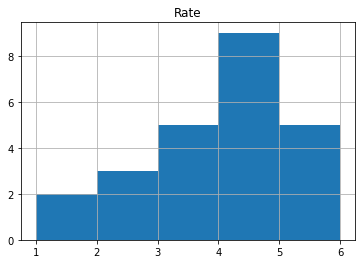

In [126]:
# olhando para a distribuicao dos dados...
hist = data_mcar.hist(bins=np.arange(1,7))

Aparentemente, não há uma causa dos dados faltantes, então temos um cenário **MCAR**, para o qual existem várias técnicas disponíveis para minimizar o efeito de dados faltantes.

Note que $V_m$, mostradas acima não parece ter qualquer relação com os valores de $V_m$ nem com outras variáveis $V_c$ observadas.

---

* **Faltantes (condicionalmente) aleatórios** ou *missing at random (MAR)*:
    - a probabilidade de $V_m$ ser faltante é independente de $V_m$, mas está relacionada a outras variáveis $V_c$ (para os quais há dados disponíveis) no dataset;
    - *exemplo*: ao revisar um serviço contratado online, *homens* tendem a omitir a satisfação sobre o serviço, mas isso *não* tem nada a ver com seu nível de satisfação,
    - *nesse caso:* $V_c$ são uma amostra representativa apenas para certo conjunto de observações,



In [108]:
data_mar = pd.read_csv("./dados/TACTD_01B_Dadosfaltantes_MAR.csv")

data_mar[:10]

,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,4.0
1,iizi@yahoo.ca,Ivo Izidro,M,NaN
2,multiplx@mac.com,Lindsey Lever,M,3.0
3,bader@sbcglobal.net,Desiree Dardar,F,3.0
4,nasarius@aol.com,Mariann Mulero,F,3.0
5,jusdisgi@outlook.com,Kathey Kleiman,F,4.0
6,rrollison@aol.com,Rupert Rollison,M,2.0
7,seymoress@aol.com,Signe Seymore,F,4.0
8,loralemo@gmail.com,Lora Lemoine,F,4.0
9,leanne99@comcast.net,Leanne Lowy,F,4.0


Observar os dados visualmente pode não significar muito... vamos usar estatística descritiva e depois olhar apenas para os dados faltantes

In [109]:
data_mar.describe()

,Rate
count,24.000000
mean,3.458333
std,1.102533
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [110]:
# observando os dados de avaliacoes que sao nulos
data_mar[data_mar['Rate'].isnull()]

,e-mail,Name,Sex,Rate
1,iizi@yahoo.ca,Ivo Izidro,M,NaN
12,kk@verizon.net,Kraig Kriner,M,NaN
18,agapow@comcast.net,Ricardo Rima,M,NaN
23,joelw@live.com,Elias Elmo,M,NaN
25,jaju@mac.com,Jada Judon,M,NaN
27,njpayne@comcast.net,Lillian Labree,F,NaN


In [111]:
data_mar[data_mar['Sex']=='F'].describe()

,Rate
count,17.000000
mean,3.705882
std,1.046704
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [112]:
data_mar[data_mar['Sex']=='M'].describe()

,Rate
count,7.000000
mean,2.857143
std,1.069045
min,1.000000
25%,2.500000
50%,3.000000
75%,3.500000
max,4.000000


--- 

* **Faltantes não aleatórios**, respostas não ignoráveis ou *missing not at random (MNAR)*:
    - dados não MCAR e não MAR;
    - o valor da variável faltante é a razão pela qual ela está faltando;
    - *exemplo*: ao revisar um produto comprado, clientes tendem a omitir o nível satisfação com o produto **devido** ao nível de satisfação,
    - *nesse caso:* ?



In [113]:
data_nr = pd.read_csv("./dados/TACTD_01B_Dadosfaltantes_NonRandom.csv")

data_nr[:10]

,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,4.0
1,iizi@yahoo.ca,Ivo Izidro,M,5.0
2,multiplx@mac.com,Lindsey Lever,M,3.0
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,NaN
5,jusdisgi@outlook.com,Kathey Kleiman,F,4.0
6,rrollison@aol.com,Rupert Rollison,M,NaN
7,seymoress@aol.com,Signe Seymore,F,4.0
8,loralemo@gmail.com,Lora Lemoine,F,4.0
9,leanne99@comcast.net,Leanne Lowy,F,4.0


In [114]:
data_nr.describe()

,Rate
count,21.000000
mean,4.095238
std,0.624881
min,3.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,5.000000


In [115]:
data_nr[data_nr['Rate'].isnull()]

,e-mail,Name,Sex,Rate
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,NaN
6,rrollison@aol.com,Rupert Rollison,M,NaN
11,danzigism@aol.com,Mayra Mcnish,F,NaN
13,cobree@aol.com,Carlos Cobre,M,NaN
20,temmink@icloud.com,Willene Wolfgram,F,NaN
26,tubajon@sbcglobal.net,Joelle Jaffee,F,NaN
27,njpayne@comcast.net,Lillian Labree,F,NaN
29,dfevre@optonline.net,Douglas Damario,M,NaN


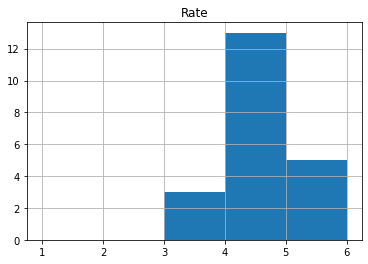

In [124]:
# olhando para a distribuicao dos dados...
hist = data_nr.hist(bins=np.arange(1,7))

## Resumo e considerações finais

Bases de dados reais possuem problemas relacionados à coleta que não podem ser negligenciados

Parte importante do trabalho do cientista de dados é reconhecer esses problemas

**Dados faltantes** é um desses problemas e pode ocorrer em três tipos principais
* Completamente Aleatório - MCAR
* Aleatório (condicionalmente) - MAR
* Não aleatório

A abordagem para tratar cada caso deve ser diferente!